In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [31]:
df =pd.read_csv("movie.csv")

In [44]:
# take a look into the data

In [45]:
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


In [32]:
df.shape

(5043, 28)

In [66]:
df['movie_title'].tail(3)

5040    A Plague So Pleasant 
5041        Shanghai Calling 
5042       My Date with Drew 
Name: movie_title, dtype: object

In [67]:
pd.Series(df.columns)

0                         color
1                 director_name
2        num_critic_for_reviews
3                      duration
4       director_facebook_likes
5        actor_3_facebook_likes
6                  actor_2_name
7        actor_1_facebook_likes
8                         gross
9                        genres
10                 actor_1_name
11                  movie_title
12              num_voted_users
13    cast_total_facebook_likes
14                 actor_3_name
15         facenumber_in_poster
16                plot_keywords
17              movie_imdb_link
18         num_user_for_reviews
19                     language
20                      country
21               content_rating
22                       budget
23                   title_year
24       actor_2_facebook_likes
25                   imdb_score
26                 aspect_ratio
27         movie_facebook_likes
dtype: object

In [33]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.850739e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.847192e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.351178e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.552850e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.231996e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [46]:
#Do we have any duplicates ? 

In [56]:
print('Number of duplicates in data: {}'.format(sum(df.duplicated(subset=['movie_title'], keep=False))))

Number of duplicates in data: 0


In [57]:
df = df.drop_duplicates(subset=['movie_title'], keep='first').copy()

In [58]:
print('Number of duplicates in data: {}'.format(sum(df.duplicated(subset=['movie_title','title_year',], keep=False))))

Number of duplicates in data: 0


In [75]:
#check if data has any null values
df.isnull().sum().reset_index()

,index,0
0,color,19
1,director_name,102
2,num_critic_for_reviews,49
3,duration,15
4,director_facebook_likes,102
5,actor_3_facebook_likes,23
6,actor_2_name,13
7,actor_1_facebook_likes,7
8,gross,863
9,genres,0


In [70]:
df.isnull().values.any()

True

In [79]:
#how many values are null in each column
def show_missing_data(df):
    missing_data = df.isnull().sum().reset_index()
    missing_data.columns=['column_name','missing_count']
    missing_data['filling_factor']=(df.shape[0] - missing_data['missing_count']) / df.shape[0] * 100
    return missing_data.sort_values('filling_factor').reset_index(drop=True)
show_missing_data(df).head(4)

,column_name,missing_count,filling_factor
0,gross,863,82.45
1,budget,484,90.16
2,aspect_ratio,326,93.37
3,content_rating,300,93.90


In [90]:
df.dropna(subset=['gross'], how= 'all', inplace = True)
show_missing_data(df)[:5]

,column_name,missing_count,filling_factor
0,budget,265,93.46
1,aspect_ratio,104,97.43
2,content_rating,63,98.45
3,plot_keywords,40,99.01
4,actor_3_name,13,99.68


In [91]:
#fill out missing budget datapoints with the median budget for the year it was released.

In [94]:
median_budget_per_year= df.groupby('title_year')['budget'].transform('median')
df['budget'].fillna(median_budget_per_year, inplace = True)

In [95]:
show_missing_data(df)[:5]

,column_name,missing_count,filling_factor
0,aspect_ratio,104,97.43
1,content_rating,63,98.45
2,plot_keywords,40,99.01
3,actor_3_name,13,99.68
4,actor_3_facebook_likes,13,99.68


In [96]:
data.fillna(0, inplace=True)

In [97]:
df = df[df['title_year'] != 0] 

In [98]:
df = df[df['country'] == 'USA']

In [99]:
# Movies per year

array([[<AxesSubplot:title={'center':'title_year'}>]], dtype=object)

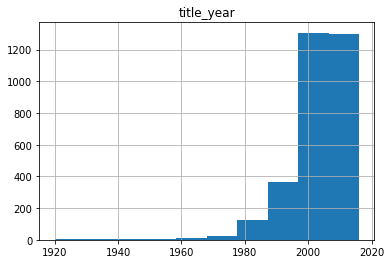

In [100]:
df.hist(column = 'title_year')

In [101]:
# median gross box office per actor

Text(0.5, 0, 'Gross (in million)')

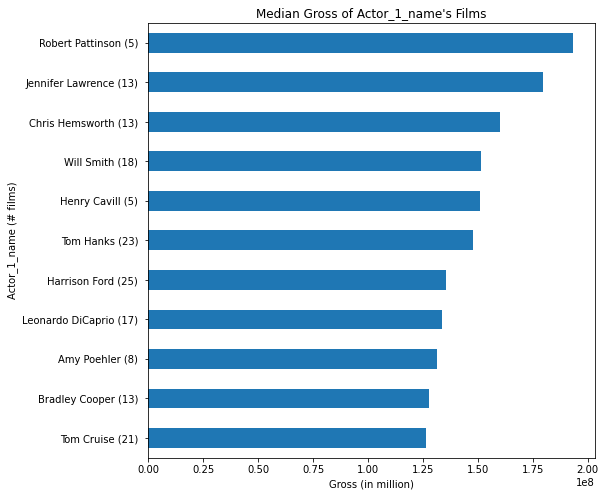

In [108]:
fig = plt.figure(figsize = (8,8))
comparison_df = df.groupby('actor_1_name', as_index =False).mean().sort_values('gross',ascending = False)

name_count_key = df['actor_1_name'].value_counts().to_dict()
comparison_df['films'] = comparison_df['actor_1_name'].map(name_count_key)

comparison_df['actor_1_name'] = comparison_df['actor_1_name'].map(str) + " (" + comparison_df['films'].astype(str) + ") "

comparison_df[comparison_df['films'] >= 5][['actor_1_name', 'gross']][10::-1].set_index('actor_1_name').iloc[:,0].plot(kind='barh')
plt.legend().set_visible(False)
plt.title("Median Gross of Actor_1_name's Films")
plt.ylabel("Actor_1_name (# films)")
plt.xlabel("Gross (in million)")

<AxesSubplot:xlabel='title_year', ylabel='gross'>

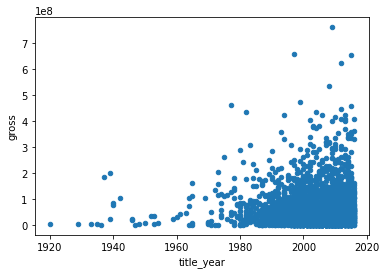

In [109]:
#title year vs gross
df.plot.scatter(x='title_year', y='gross')

<AxesSubplot:xlabel='budget', ylabel='gross'>

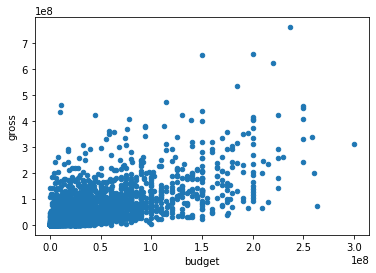

In [111]:
#budget vs gross
df.plot.scatter(x='budget', y='gross')

In [117]:
numerical_columns = df.dtypes[df.dtypes != 'object'].index
numerical_data  = df[numerical_columns]
#drop aspect_ratio, as it does not provide any useful info
numerical_data.drop('aspect_ratio', axis=1, inplace= True)
numerical_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.00,178.00,0.00,855.00,"1,000.00","760,505,847.00",886204,4834,0.00,"3,054.00","237,000,000.00","2,009.00",936.00,7.90,33000
1,302.00,169.00,563.00,"1,000.00","40,000.00","309,404,152.00",471220,48350,0.00,"1,238.00","300,000,000.00","2,007.00","5,000.00",7.10,0
3,813.00,164.00,"22,000.00","23,000.00","27,000.00","448,130,642.00",1144337,106759,0.00,"2,701.00","250,000,000.00","2,012.00","23,000.00",8.50,164000
5,462.00,132.00,475.00,530.00,640.00,"73,058,679.00",212204,1873,1.00,738.00,"263,700,000.00","2,012.00",632.00,6.60,24000
6,392.00,156.00,0.00,"4,000.00","24,000.00","336,530,303.00",383056,46055,0.00,"1,902.00","258,000,000.00","2,007.00","11,000.00",6.20,0


In [118]:
#train data

In [119]:
train, test =train_test_split(numerical_data, test_size = 0.2)
target_train = train.pop('gross')
target_test = test.pop('gross')